In [44]:
##Setup Kaggel Api key and username to download the data
import os
os.environ['KAGGLE_USERNAME'] = "saurabhpojhi" # username from the json file
os.environ['KAGGLE_KEY'] = "dc18e41728bd4122b15268bb510846b1" # Provide your key from the json file
!kaggle competitions download -c dogs-vs-cats # api copied from kaggle

sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [45]:
# Upload data and extract the contents
from zipfile import ZipFile

file_name = "/content/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [47]:
data_dir_list = os.listdir('/content/train') # jere my train dataset main directery
#print(data_dir_list)

path, dirs, files = next(os.walk("/content/train"))  # here i am counting the no. of files 
file_count = len(files)
print(file_count)

original_dataset_dir = '/content/train' # here is my original dataset directery
base_dir = '/content/cats_and_dogs_small' # i am creating another directory for store train dataset
os.mkdir(base_dir) #make base directory

25000


FileExistsError: ignored

In [48]:
#Create directory paths for train, valid, test datasets

train_dir = os.path.join(base_dir, 'train')  # create train dir forlder for training dataset
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation') # create valdation dir  folder for validate dataset
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test') # create test dir  folder for testing dataset
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats') # here under train_dir i am create cat dir folder
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs') # here under train_dir i am create dog dir folder
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats') # here under validation_dir i am create cat dir folder
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs') # here under validation_dir i am create dog dir folder
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats') # here under test_dir i am create cat dir folder
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs') # here under test_dir i am create dog dir folder
os.mkdir(test_dogs_dir)

FileExistsError: ignored

In [49]:
import shutil

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]       # here i am take 1000 image of cat for train
for fname in fnames:
     src = os.path.join(original_dataset_dir, fname)
     dst = os.path.join(train_cats_dir, fname)
     #print(src,dst)
     shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]  # here i am take 1000to 15000 means 500 image of cat for validation
for fname in fnames:
     src = os.path.join(original_dataset_dir, fname)
     dst = os.path.join(validation_cats_dir, fname)
     shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]  # here i am take 1500 to 2000  means 500 image of cat for test
for fname in fnames:
     src = os.path.join(original_dataset_dir, fname)
     dst = os.path.join(test_cats_dir, fname)
     shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] # here i am take 1000 image of dog for train
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)] # here i am take 1000 to 1500 means 500 image of dog for validation
for fname in fnames:
     src = os.path.join(original_dataset_dir, fname)
     dst = os.path.join(validation_dogs_dir, fname)
     shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)] # here i am take 1500 to 2000 means 500 image of dog for test
for fname in fnames:
     src = os.path.join(original_dataset_dir, fname)
     dst = os.path.join(test_dogs_dir, fname)
     shutil.copyfile(src, dst)

In [50]:
# here print the how many images in each folder 
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [51]:
 # building the model using keras 
 from keras import layers
from keras import models

#Created sequential models using Keras
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) # here 32 kernel 3 , 3 size here my image size is 150, 150 ,3 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [63]:
#from tensorflow.keras import optimizers
#from keras import optimizers
#optimizers.RMSprop()
#model.compile(loss='binary_crossentropy', 
 #             opt = tensorflow.keras.optimizers.RMSprop()
  ##             # optimizer = keras.optimizers.RMSprop(lr=0.0003, decay=1e-6),
    #          metrics=['acc'])

In [70]:

import tensorflow
from tensorflow.keras import optimizers
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1),
              metrics=['acc'])

In [72]:
from keras.preprocessing.image import ImageDataGenerator  #here i am using data augmentaion 

train_datagen = ImageDataGenerator(rescale=1./255)        # here i am rescale the images 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,              
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [73]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 95s 939ms/step - loss: 161547296.0000 - acc: 0.4980 - val_loss: 0.6948 - val_acc: 0.5100
Epoch 2/30
100/100 [==============================] - 93s 933ms/step - loss: 0.7065 - acc: 0.4990 - val_loss: 0.6942 - val_acc: 0.4600
Epoch 3/30
100/100 [==============================] - 93s 932ms/step - loss: 0.6977 - acc: 0.5010 - val_loss: 0.6927 - val_acc: 0.5150
Epoch 4/30
100/100 [==============================] - 93s 931ms/step - loss: 0.6967 - acc: 0.4950 - val_loss: 0.6926 - val_acc: 0.5150
Epoch 5/30
100/100 [==============================] - 93s 931ms/step - loss: 0.6954 - acc: 0.5060 - val_loss: 0.7016 - val_acc: 0.5000
Epoch 6/30
100/100 [==============================] - 93s 932ms/step - loss: 0.6968 - acc: 0.5000 - val_loss: 0.6927 - val_acc: 0.5200
Epoch 7/30
100/100 [==============================] - 93s 934ms/step - loss: 0.6971 - acc: 0.4790 - val_loss: 0.6987 - val_acc: 0.5250
Epoch 8/30
100/100 [===========================

In [74]:
model.save('cats_and_dogs_small_1.h5')   # save model

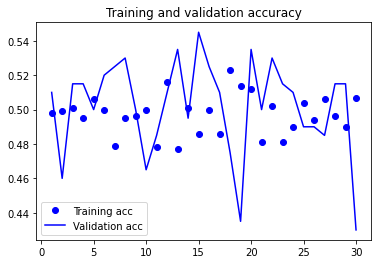

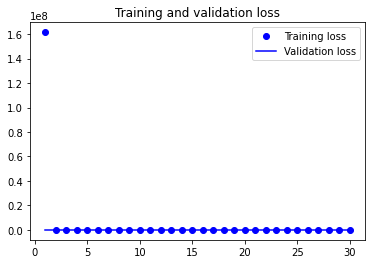

In [75]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

 now we get the overfittiing the data and now apply dropout 

In [76]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [77]:
import tensorflow
from tensorflow.keras import optimizers
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1),
              metrics=['acc'])

In [79]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [82]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 103s 1s/step - loss: 0.7248 - acc: 0.5040 - val_loss: 0.6914 - val_acc: 0.5125


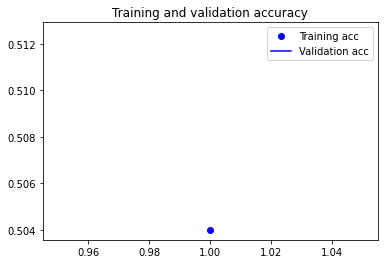

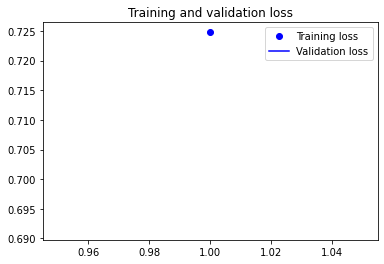

In [83]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()